In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.feature_selection import RFE, SelectKBest, f_regression

%matplotlib inline

In [2]:
#loads dataset into a pandas dataframe
fit_df = pd.read_csv('25.csv')

In [3]:
fit_df.head() #shows contents of the dataframe

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [4]:
#returns number of rows and columns of dataframe; stores it in tuple
fit_df.shape

(96, 7)

In [5]:
#drops 'calories_burned' column
fit_df.drop('calories_burned', axis=1, inplace=True)

In [6]:
#show contents of dataframe
fit_df.head()

,date,step_count,mood,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,5,0,66
1,2017-10-07,6041,100,8,0,66
2,2017-10-08,25,100,5,0,66
3,2017-10-09,5461,100,4,0,66
4,2017-10-10,6915,200,5,500,66


In [7]:
fit_df['step_count'].max() #returns max value in step_count column

7422

In [8]:
fit_df['step_count'].min() #returns min value in step_count column

25

In [9]:
fit_df['step_count'].mean() #returns average of all values in step_count column

2935.9375

In [10]:
fit_df['step_count'].median() #returns median of all values in 'step_count' column

2987.5

In [11]:
fit_df['hours_of_sleep'].unique() #shows all values of 'hours_of_sleep' column

array([5, 8, 4, 6, 7, 3, 2, 9], dtype=int64)

In [12]:
fit_df['bool_of_active'].unique() #shows all values of 'bool_of_active' column

array([  0, 500], dtype=int64)

In [13]:
fit_df['weight_kg'].unique() #shows all values of 'weight_kg' column

array([66, 65, 64], dtype=int64)

In [14]:
#shows values in date column
fit_df['date']

0     2017-10-06
1     2017-10-07
2     2017-10-08
3     2017-10-09
4     2017-10-10
5     2017-10-11
6     2017-10-12
7     2017-10-13
8     2017-10-14
9     2017-10-15
10    2017-10-16
11    2017-10-17
12    2017-10-18
13    2017-10-19
14    2017-10-20
15    2017-10-21
16    2017-10-22
17    2017-10-23
18    2017-10-24
19    2017-10-25
20    2017-10-26
21    2017-10-27
22    2017-10-28
23    2017-10-29
24    2017-10-30
25    2017-10-31
26    2017-11-01
27    2017-11-02
28    2017-11-03
29    2017-11-04
         ...    
66    2017-12-11
67    2017-12-12
68    2017-12-13
69    2017-12-14
70    2017-12-15
71    2017-12-16
72    2017-12-17
73    2017-12-18
74    2017-12-19
75    2017-12-20
76    2017-12-21
77    2017-12-22
78    2017-12-23
79    2017-12-24
80    2017-12-25
81    2017-12-26
82    2017-12-27
83    2017-12-28
84    2017-12-29
85    2017-12-30
86    2017-12-31
87    2018-01-01
88    2018-01-02
89    2018-01-03
90    2018-01-04
91    2018-01-05
92    2018-01-06
93    2018-01-

In [15]:
#Extracts month from date
fit_df['month'] = pd.DatetimeIndex(fit_df['date']).month

In [16]:
#shows contents of updated dataframe
fit_df.head()

,date,step_count,mood,hours_of_sleep,bool_of_active,weight_kg,month
0,2017-10-06,5464,200,5,0,66,10
1,2017-10-07,6041,100,8,0,66,10
2,2017-10-08,25,100,5,0,66,10
3,2017-10-09,5461,100,4,0,66,10
4,2017-10-10,6915,200,5,500,66,10


In [17]:
#drops date column from dataframe
fit_df.drop('date', axis=1, inplace=True)

In [18]:
fit_df.head()

,step_count,mood,hours_of_sleep,bool_of_active,weight_kg,month
0,5464,200,5,0,66,10
1,6041,100,8,0,66,10
2,25,100,5,0,66,10
3,5461,100,4,0,66,10
4,6915,200,5,500,66,10


In [19]:
fit_df['month'].unique() #shows values of 'month' column

array([10, 11, 12,  1], dtype=int64)

In [20]:
fit_df['step_count'].mean() #takes average value of the step_count column

2935.9375

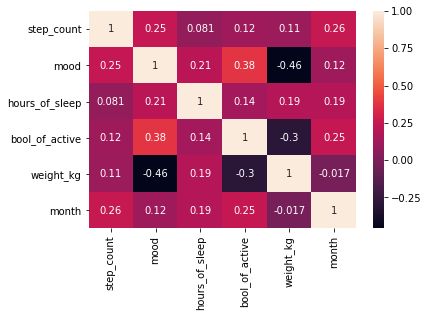

In [21]:
#shows the heatmap of the updated dataframe
fit_df_corr = fit_df.corr()
sns.heatmap(fit_df_corr, annot=True)

In [22]:
#resamples dataframe to a 1000 rows
fit_df = resample(fit_df, n_samples = 1000)

In [23]:
#splits up dataframe into features dataframe and target column
X = fit_df.drop('step_count', axis=1)
y = fit_df['step_count']

In [61]:
#Initializes SelectKBest function
selectkbest = SelectKBest(score_func=f_regression, k=2)

In [62]:
#Selects at least three features to use from the features set in building a predictive model
selectkbest.fit(X, y)

SelectKBest(k=2, score_func=<function f_regression at 0x000001EAB2C549D8>)

In [63]:
#prints the sizes of the features set and the selected features set
selected_xs = selectkbest.transform(X)
print(X.shape, selected_xs.shape)

(1000, 5) (1000, 2)


In [64]:
#Intializes Linear Regression function
lr = LinearRegression()

#prints mean cross validation score of all features against the target 
print('All features')
scores = cross_val_score(lr, X, y)
print(scores, '\n', 'Mean: ', scores.mean(),'\n')

#prints mean cross validation score of selected features against the target 
print('Feature Selection via SelectKBest')
scores = cross_val_score(lr, selected_xs, y)
print(scores, '\n', 'Mean: ', scores.mean())

All features
[ 0.23293642  0.19202906  0.15526432] 
 Mean:  0.193409930554 

Feature Selection via SelectKBest
[ 0.10833442  0.11319008  0.11616756] 
 Mean:  0.112564018964


In [28]:
#shows values of target variable(step_count)
y.unique()

array([3158,  774,  614,  651,  518, 7102, 1831, 1231,  437, 4683,  133,
       3941, 4064,  546,  221, 4275, 2203, 3149, 5999,  269, 2822,   36,
       1230, 6041, 2599, 3148, 4136, 5461,  181, 5376, 1696, 4108, 4005,
       5934,  493, 1163, 4421, 3608,  177, 1867, 2255, 3066, 4921, 4880,
        202, 6930,  153, 3575,  799,  705,  330, 5195,  570,  500,  299,
       4068, 6500, 6915, 2909, 1421, 1580, 1447, 4435, 3881, 4340, 4383,
       4779, 6314,  292, 4550, 5464, 2374, 4545, 4687, 7422,  753,   25,
       6676, 4732, 1648, 5537, 1258, 3519, 4061, 2127,   61, 3721, 4033,
       4037,  702, 2209,  995,  539, 2725], dtype=int64)

In [29]:
#shows contents of predictor set
X.head()

,mood,hours_of_sleep,bool_of_active,weight_kg,month
17,200,5,0,65,10
56,300,6,500,64,12
37,300,4,500,64,11
78,100,5,0,64,12
80,100,3,0,64,12


In [30]:
#shows contents of target column
y.head()

17    3158
56     774
37     614
78     651
80     518
Name: step_count, dtype: int64

In [31]:
X.shape

(1000, 5)

In [32]:
y.shape

(1000,)

In [33]:
#splits predictor set and target column into a training set and test set, in this case 80% of data was allocated towards the training set and 20% was allocated towards the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [34]:
#displays sizes of all of the training and test dataframes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 5), (200, 5), (800,), (200,))

In [35]:
#Inttializes StandardScaler function
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #Standardizes X_train
X_test = sc.fit_transform(X_test) #Standardizes X_test

In [36]:
#Initializes RandomForestClassifier function
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train) #builds predictive algorithm with training sets using Random Forest Classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
rfc.score(X_test, y_test) #scores Random Forest Classifier algorithm on the test sets

0.51000000000000001

In [38]:
#Initializes KNeighborsClassifier function with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
knn.fit(X_train, y_train) #builds predictive alorightm using KNearestNeighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
knn.score(X_test, y_test) #scores predictive algorithm on testing sets

0.48999999999999999

In [41]:
lr = LinearRegression() #Initializes Linear Regression function

In [65]:
lr.fit(X_train, y_train) #Builds predictive algorithm using Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
lr.score(X_test, y_test) #scores Linear Regression algorithm on testing sets

0.049900935258176737

In [44]:
#Builds predictive model using Lasso Regression
clf = linear_model.Lasso()
clf.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
clf.score(X_test, y_test)

0.050463432889210069

In [46]:
#Builds predictive model using Ridge Regression
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
ridge.score(X_test, y_test)

0.050375652923459469

In [48]:
#Builds predictive model using ElasticNet
en = linear_model.ElasticNet()
en.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
en.score(X_test, y_test)

0.090579802642480667

In [50]:
#predicts target values from Random Forest Classifiction predictive model
y_pred = rfc.predict(X_test)

In [51]:
#prints classification report 
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         25       0.00      0.00      0.00         3
         36       0.00      0.00      0.00         2
         61       0.00      0.00      0.00         0
        133       1.00      1.00      1.00         4
        177       0.00      0.00      0.00         0
        181       0.00      0.00      0.00         2
        202       1.00      1.00      1.00         4
        221       0.33      1.00      0.50         1
        269       0.14      1.00      0.25         1
        292       0.29      1.00      0.44         2
        299       0.50      1.00      0.67         1
        330       1.00      1.00      1.00         5
        437       0.57      1.00      0.73         4
        493       1.00      1.00      1.00         2
        518       0.50      1.00      0.67         2
        539       0.00      0.00      0.00         1
        546       0.00      0.00      0.00         4
        570       1.00      1.00      1.00   

C:\Users\vbots\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vbots\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [52]:
#prints classification accuracy score between predicted and actual target values
print(accuracy_score(y_test, y_pred))

0.51


In [53]:
#prints baseline accuracy of target column
y_test.value_counts().head(1) / len(y_test)

614    0.03
Name: step_count, dtype: float64

In [54]:
type(y_pred)

numpy.ndarray

In [55]:
#adds the predicted and actual y values(target values)
y_test + y_pred

26     6266
19     4173
27     7034
15     5644
50     6545
75    13602
79     2449
23      660
25     9100
23      660
88     2894
51      986
88     2894
37     1228
24     2501
70      874
67    14204
75    13602
91      266
33     8136
55     7744
35     5864
73    12023
20     8074
29     4510
2        86
47     6252
42      974
22      584
24     2501
      ...  
89     5198
79     2449
88     2894
79     2449
12     9464
82    11210
11     6267
5      9090
53     2326
44      538
39     8010
64     3346
68    11043
2        86
73    12023
10     6296
83    12798
77     4238
39     8010
27     7034
76    10677
77     4238
38     7285
45     6106
77     4238
9      4080
62     3942
60    11868
11     6267
15     5644
Name: step_count, Length: 200, dtype: int64

In [56]:
y_pred

array([1831,  292, 2255, 2822, 5999, 7102, 1696,  330, 4550,  330, 1447,
        493, 1447,  614,  292,  437, 7102, 7102,  133, 4068, 4136, 1831,
       7102, 4037, 2255,   61, 1831,  269,  292,  292,  299,  614, 1580,
       2255,  177, 1831, 6041, 5934,  518,  774, 3158, 2822,  437, 4550,
       7102, 2374, 2203, 3148,  177, 3158, 6041,  774, 4136, 4136,  330,
        133, 1696, 4683, 5999, 5999, 2822,  177, 1831,   61, 7102, 1831,
       7102,  269,  221, 2203,  177, 5999, 1831,  292, 4683, 4037, 5464,
        133,  269,  221, 1867, 6676, 1831, 4136, 2599, 1230, 7422,  133,
        518, 1831, 3519, 1231,  437,  269,  269, 7102,  330, 4545, 1831,
       4136,  202, 7102,  437,  614, 4136, 5464, 5934, 4136,  437,  202,
        570, 4732, 5999, 1230, 1696, 5999, 4545, 6915,  177,  493, 1163,
        202, 1867,  292, 1648, 6041, 1580, 3148, 1230, 7422, 1831,  437,
        614,  570, 4136, 4683, 7102, 1831,  614,  292, 2255,  202, 1831,
       5999,  518, 3148, 5999,  269, 3158, 3148, 71

In [57]:
df = pd.DataFrame() #initializes new dataframe

In [58]:
#creates two new columns in dataframe
df['y'] = y_test 
df['real y'] = y_pred

In [59]:
df.head(100)

,y,real y
26,4435,1831
19,3881,292
27,4779,2255
15,2822,2822
50,546,5999
75,6500,7102
79,753,1696
23,330,330
25,4550,4550
23,330,330


(array([ 275.,   83.,   80.,   56.,   94.,  134.,   89.,   63.,   80.,   46.]),
 array([   25. ,   764.7,  1504.4,  2244.1,  2983.8,  3723.5,  4463.2,
         5202.9,  5942.6,  6682.3,  7422. ]),
 <a list of 10 Patch objects>)

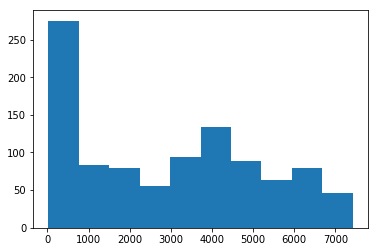

In [60]:
#plots histogram of 'step_count' column
plt.hist(fit_df['step_count'])